In [13]:
!pip install darts

  Using cached darts-0.31.0-py3-none-any.whl.metadata (52 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached nfoursid-1.0.1-py3-none-any.whl.metadata (1.9 kB)
  Using cached pyod-2.0.2.tar.gz (165 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached tbats-1.1.3-py3-none-any.whl.metadata (3.8 kB)
  Using cached pytorch_lightning-2.4.0-py3-none-any.whl.metadata (21 kB)
  Using cached tensorboardX-2.6.2.2-py2.py3-none-any.whl.metadata (5.8 kB)
  Using cached lightning_utilities-0.11.9-py3-none-any.whl.metadata (5.2 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
  Using cached cloudpickle-3.1.0-py3-none-any.whl.metadata (7.0 kB)
  Using cached fugue-0.9.1-py3-none-any.whl.metadata (18 kB)
  Using cached triad-0.9.8-py3-none-any.whl.metadata (6.3 kB)
  Using cached adagio-0.2.6-py3-none-any.whl.metadata (1.8 kB)
  Using cached aiosignal-1.3.1-py3-none-any.whl.metadata

  You can safely remove it manually.


Naive Seasonal - MAPE: 13.87
Naive Drift - MAPE: 11.82
Exponential Smoothing - MAPE: 2.90
AutoARIMA - MAPE: 13.71
Theta - MAPE: 23.96

Validation MAPE for all models:
                   Model       MAPE
0         Naive Seasonal  13.872672
1            Naive Drift  11.823639
2  Exponential Smoothing   2.895776
3              AutoARIMA  13.711294
4                  Theta  23.962565


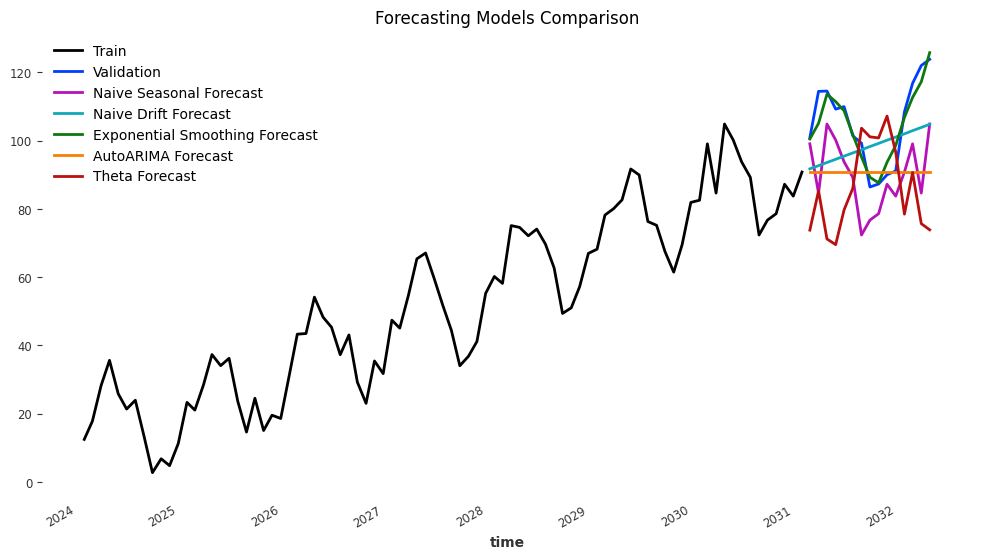

In [15]:
import numpy as np
import pandas as pd
from darts import TimeSeries
from darts.models import (
    NaiveSeasonal, NaiveDrift, ExponentialSmoothing, AutoARIMA,
    Theta, Prophet
)
from darts.metrics import mape
import matplotlib.pyplot as plt

# Data Creation
np.random.seed(42)
time_stamps = 100
trend = np.linspace(10, 110, time_stamps)  # Linear trend
seasonality = 15 * np.sin(2 * np.pi * np.arange(time_stamps) / 12)  # Seasonality with 12-month cycle
noise = np.random.normal(0, 5, time_stamps)  # Gaussian noise
data = trend + seasonality + noise

# Create time index and DataFrame
time_index = pd.date_range(start="2024-01", periods=time_stamps, freq="M")
monthly_df = pd.DataFrame({"Timestamp": time_index, "Value": data})

# Split into train (85 timestamps) and validation (15 timestamps)
train = data[:85]
validation = data[85:]

# Convert to Darts TimeSeries
train_series = TimeSeries.from_times_and_values(time_index[:85], train)
validation_series = TimeSeries.from_times_and_values(time_index[85:], validation)

# Initialize forecasting models
models = {
    "Naive Seasonal": NaiveSeasonal(K=12),
    "Naive Drift": NaiveDrift(),
    "Exponential Smoothing": ExponentialSmoothing(),
    "AutoARIMA": AutoARIMA(),
    "Theta": Theta(),
    
}

# Train models and evaluate on validation data
results = []
forecasts = {}  # Store forecasts for plotting
for name, model in models.items():
    model.fit(train_series)  # Fit the model
    forecast = model.predict(len(validation_series))  # Predict for 15 timestamps
    forecasts[name] = forecast
    mape_score = mape(validation_series, forecast)  # Calculate MAPE
    results.append({"Model": name, "MAPE": mape_score})
    print(f"{name} - MAPE: {mape_score:.2f}")

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Print the results
print("\nValidation MAPE for all models:")
print(results_df)

# Plot validation and forecasts for comparison
plt.figure(figsize=(12, 6))
train_series.plot(label="Train", linewidth=2)
validation_series.plot(label="Validation", linewidth=2)

# Plot all model forecasts
for name, forecast in forecasts.items():
    forecast.plot(label=f"{name} Forecast")

plt.title("Forecasting Models Comparison")
plt.legend()
plt.grid()
plt.show()

# Save MAPE results to CSV
results_df.to_csv("validation_mape_results.csv", index=False)


In [16]:
!pip install nixtlats

  Using cached tenacity-9.0.0-py3-none-any.whl.metadata (1.2 kB)
  Using cached h11-0.14.0-py3-none-any.whl.metadata (8.2 kB)
  Using cached annotated_types-0.7.0-py3-none-any.whl.metadata (15 kB)
  Using cached sniffio-1.3.1-py3-none-any.whl.metadata (3.9 kB)
   ---------------------------------------- 0.0/2.0 MB ? eta -:--:--
   ---------------------------------------- 2.0/2.0 MB 13.7 MB/s eta 0:00:00
Using cached tenacity-9.0.0-py3-none-any.whl (28 kB)
Using cached annotated_types-0.7.0-py3-none-any.whl (13 kB)
Using cached h11-0.14.0-py3-none-any.whl (58 kB)
Using cached sniffio-1.3.1-py3-none-any.whl (10 kB)


In [22]:
!pip install nixtla
!pip install --upgrade nixtla


In [23]:
import pandas as pd
from nixtla import NixtlaClient
from darts.metrics import mape
import matplotlib.pyplot as plt

# Use the same existing train and validation data
train = data[:85]  # First 85 timestamps
validation = data[85:]  # Remaining 15 timestamps
time_index_train = pd.date_range(start="2024-01", periods=85, freq="M")
time_index_validation = pd.date_range(start="2030-02", periods=15, freq="M")

# Prepare training data for NixtlaClient
train_df = pd.DataFrame({"ds": time_index_train, "y": train})

# Initialize NixtlaClient
api_key = "nixak-5Vvy3PPMWSRwNGs4eBG7cJ14St1RK0reZXTZqOQ8yWhd4BsM1JM0bvHmg9iHsWzUu5FUGPuDkbJDK9i2"  # Replace with your valid Nixtla API key
client = NixtlaClient(api_key=api_key)

# Forecast for the next 15 steps
forecast = client.forecast(data=train_df, h=15)

# Extract forecasted values
forecast_values = forecast["yhat"].values

# Calculate MAPE using darts' mape function
validation_mape = mape(validation, forecast_values)
print(f"Nixtla TimeGPT - Validation MAPE: {validation_mape:.2f}")

# Prepare comparison DataFrame
comparison_df = pd.DataFrame({
    "Timestamp": time_index_validation,
    "Validation": validation,
    "Nixtla Forecast": forecast_values
})
print("\nValidation vs Nixtla Forecast:")
print(comparison_df)

# Plot Train, Validation, and Nixtla Forecast
plt.figure(figsize=(10, 6))
plt.plot(time_index_train, train, label="Train Data")
plt.plot(time_index_validation, validation, label="Validation Data", color="orange")
plt.plot(time_index_validation, forecast_values, label="Nixtla Forecast", linestyle="--")
plt.title("Nixtla TimeGPT Forecast vs Validation")
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.grid()
plt.show()


TypeError: 'type' object is not subscriptable

In [ ]:
!pip uninstall nixtla

In [ ]:
!pip install nixtla==0.5.2